<a href="https://colab.research.google.com/github/pranavinemalikanti/projects/blob/main/Image_classification_with_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [ ]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()
training_images, testing_images = training_images / 255, testing_images / 255

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 433s 3us/step


In [ ]:
class_names = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

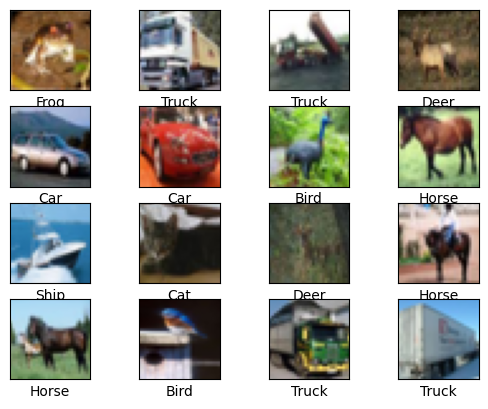

In [ ]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])

plt.show()

In [ ]:
#reducing size
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))       #filters for features
model.add(layers.MaxPooling2D((2,2)))    #reduces images to essential information
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.2605 - loss: 1.9704 - val_accuracy: 0.4893 - val_loss: 1.4273
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.4883 - loss: 1.4164 - val_accuracy: 0.5232 - val_loss: 1.2953
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.5601 - loss: 1.2284 - val_accuracy: 0.5673 - val_loss: 1.2108
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5948 - loss: 1.1227 - val_accuracy: 0.5922 - val_loss: 1.1599
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.6362 - loss: 1.0266 - val_accuracy: 0.6070 - val_loss: 1.1086
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.6602 - loss: 0.9617 - val_accuracy: 0.6205 - val_loss: 1.1051
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6873 - loss: 0.8939 - val_accuracy: 0.6430 - val_loss: 1.0367
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.7067 - loss: 0.8348 - 

In [ ]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

model.save('C:/Users/pranavi/Desktop/TFProj/image_classifier.keras')

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6464 - loss: 1.0404
Loss: 1.0498217344284058
Accuracy: 0.6445000171661377


In [ ]:
model = models.load_model('image_classifier.keras')

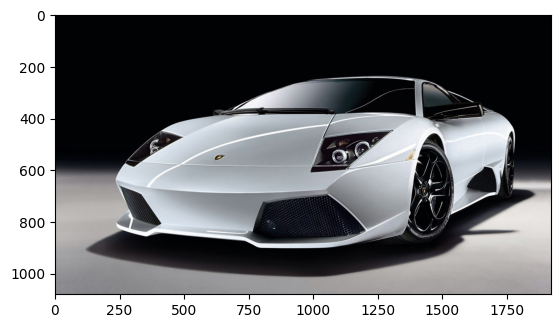

In [ ]:
img = cv.imread('C:/Users/pranavi/Downloads/carpp.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)

In [ ]:
prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')

InvalidArgumentError: Graph execution error:

Detected at node sequential_2_1/dense_2_1/Relu defined at (most recent call last):
  File "C:\Python312\Lib\runpy.py", line 198, in _run_module_as_main

  File "C:\Python312\Lib\runpy.py", line 88, in _run_code

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Python312\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\Python312\Lib\asyncio\base_events.py", line 1987, in _run_once

  File "C:\Python312\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\pranavi\AppData\Local\Temp\ipykernel_2720\1553650346.py", line 1, in <module>

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 512, in predict

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 208, in one_step_on_data_distributed

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 198, in one_step_on_data

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 96, in predict_step

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\layers\layer.py", line 901, in __call__

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\models\sequential.py", line 212, in call

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\models\functional.py", line 175, in call

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\models\functional.py", line 560, in call

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\layers\layer.py", line 901, in __call__

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\layers\core\dense.py", line 148, in call

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\activations\activations.py", line 47, in relu

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\activations\activations.py", line 99, in static_call

  File "C:\Users\pranavi\Desktop\TFProj\tfvenv\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 15, in relu

Matrix size-incompatible: In[0]: [1,8103424], In[1]: [1024,64]
	 [[{{node sequential_2_1/dense_2_1/Relu}}]] [Op:__inference_one_step_on_data_distributed_680]